# Data Analysis Project

In our data project, we use data directly imported from the World Data Bank. We have chosen to focus on nine different countries: Brazil, China, Denmark, India, Japan, Nigeria, Spain, Turkmenista and the US. These countries are chosen because they are relatively different, which makes the analysis more interesting. The variables of interest are: GDP per Capita, GDP (current in US $), Total Population, Urban Population in %, Fertility Rate and Literacy Rate. 

The notebook is organized as follows 
1.	Data Cleaning and Structuring
    - Setup
    - Download Data directly from World Bank
    - Overview of the Data and Adaption
    - Detection of Missing Data
    - Cleaned Data Set


2.	Data Analysis and Visualisations 
    - Interactive GDP per Capital Plot 
    - World Map Displaying GDP per Capita 
    - Data Visualization on Fertility Rate 


3.	Regression ?


 


# Data Cleaning and Structuring

## Setup

In [2]:
import pandas as pd
import numpy as np

**We import the packages** we need. If we do not have the packages, we have to install them. Therefore, install:
>`pip install pandas-datareader`
>`pip install wbdata`

In [3]:
import pandas_datareader
import datetime

We import the setup to download data directly from world data bank:

In [4]:
from pandas_datareader import wb

## Download Data directly from the World Data Bank 

We define the countries for the download:
China, Japan, Brazil, U.S., Denmark, Spain, Turkmenistan, India, Nigeria.

In [5]:
countries = ["CN","JP","BR","US","DK","ES","TM","IN","NG"]

We define the indicators for the download:
GDP per capita, GDP (current US $), Population total, Urban Population in %, Fertility Rate, Literacy rate.

In [6]:
indicators = {"NY.GDP.PCAP.KD":"GDP per capita", "NY.GDP.MKTP.CD":"GDP(current US $)", "SP.POP.TOTL":"Population total", 
              "SP.URB.TOTL.IN.ZS":"Urban Population in %", "SP.DYN.TFRT.IN":"Fertility Rate", "SE.ADT.LITR.ZS": "Literacy rate, adult total in %" }

We download the data and have a look at the table.

In [7]:
data_wb = wb.download(indicator= indicators, country= countries, start=1990, end=2017)
data_wb = data_wb.rename(columns = {"NY.GDP.PCAP.KD":"gdp_pC","NY.GDP.MKTP.CD":"gdp", "SP.POP.TOTL":"pop", "SP.URB.TOTL.IN.ZS":"urban_pop%", 
                                    "SP.DYN.TFRT.IN":"frt", "SE.ADT.LITR.ZS":"litr"})
data_wb = data_wb.reset_index()
data_wb.head(-5)

,country,year,gdp_pC,gdp,pop,urban_pop%,frt,litr
0,Brazil,2017,10888.982385,2.055506e+12,209288278,86.309,NaN,NaN
1,Brazil,2016,10868.653444,1.793989e+12,207652865,86.042,1.7260,NaN
2,Brazil,2015,11351.565748,1.802214e+12,205962108,85.770,1.7400,92.04790
3,Brazil,2014,11870.148408,2.455994e+12,204213133,85.492,1.7530,91.72943
4,Brazil,2013,11915.417054,2.472807e+12,202408632,85.209,1.7650,91.48424
5,Brazil,2012,11673.770536,2.465189e+12,200560983,84.923,1.7770,91.33785
6,Brazil,2011,11560.418751,2.616202e+12,198686688,84.631,1.7900,91.41124
7,Brazil,2010,11224.154083,2.208872e+12,196796269,84.335,1.8050,90.37918
8,Brazil,2009,10538.778282,1.667020e+12,194895996,84.044,1.8240,90.29821
9,Brazil,2008,10656.869466,1.695825e+12,192979029,83.749,1.8510,90.03662


We save the data file as an excel sheet in the folder we saved the current file.

In [9]:
writer = pd.ExcelWriter('pandas_simple.xlsx', engine='xlsxwriter')
data_wb.to_excel(r"./data_wb1.xlsx")

## Overview of the Data and Adaption

In [10]:
#Tonje 
data_wb.dtypes

country        object
year           object
gdp_pC        float64
gdp           float64
pop             int64
urban_pop%    float64
frt           float64
litr          float64
dtype: object

In order to ease the reading of the tables, we create a separation in all floats for the whole following file. Afterwards, we round the numbers with two decimals.

In [8]:
pd.options.display.float_format = '{:,}'.format

round(data_wb.head(),2)

,country,year,gdp_pC,gdp,pop,urban_pop%,frt,litr
0,Brazil,2017,"10,888.98","2,055,505,502,224.73",209288278,86.31,nan,nan
1,Brazil,2016,"10,868.65","1,793,989,048,409.29",207652865,86.04,1.73,nan
2,Brazil,2015,"11,351.57","1,802,214,373,741.32",205962108,85.77,1.74,92.05
3,Brazil,2014,"11,870.15","2,455,993,625,159.37",204213133,85.49,1.75,91.73
4,Brazil,2013,"11,915.42","2,472,806,919,901.67",202408632,85.21,1.76,91.48


Since the gdp is inconvenient to work with, we create a new variable gdp_in_billions showing the gdp in billions US $ and add it to the dataset.
We have a look at the table to check whether it worked out.

In [12]:
data_wb['gdp_in_bil'] = data_wb['gdp']/1000000000
round(data_wb.head(),2) #just to check

,country,year,gdp_pC,gdp,pop,urban_pop%,frt,litr,gdp_in_bil
0,Brazil,2017,"10,888.98","2,055,505,502,224.73",209288278,86.31,nan,nan,"2,055.51"
1,Brazil,2016,"10,868.65","1,793,989,048,409.29",207652865,86.04,1.73,nan,"1,793.99"
2,Brazil,2015,"11,351.57","1,802,214,373,741.32",205962108,85.77,1.74,92.05,"1,802.21"
3,Brazil,2014,"11,870.15","2,455,993,625,159.37",204213133,85.49,1.75,91.73,"2,455.99"
4,Brazil,2013,"11,915.42","2,472,806,919,901.67",202408632,85.21,1.76,91.48,"2,472.81"


We delete the variable gdp since we will continue working exclusively with the variable gdp_in_bil.

In [13]:
del data_wb['gdp']
round(data_wb.head(),2) #just to check

,country,year,gdp_pC,pop,urban_pop%,frt,litr,gdp_in_bil
0,Brazil,2017,"10,888.98",209288278,86.31,nan,nan,"2,055.51"
1,Brazil,2016,"10,868.65",207652865,86.04,1.73,nan,"1,793.99"
2,Brazil,2015,"11,351.57",205962108,85.77,1.74,92.05,"1,802.21"
3,Brazil,2014,"11,870.15",204213133,85.49,1.75,91.73,"2,455.99"
4,Brazil,2013,"11,915.42",202408632,85.21,1.76,91.48,"2,472.81"


We have a look at the shape of the dataset in order to get an overview of the observations and variables.

In [14]:
data_wb.shape

(252, 8)

We perform a summary statistics to get an overview of our dataset.

In [15]:
round(data_wb.describe(),2)

,gdp_pC,pop,urban_pop%,frt,litr,gdp_in_bil
count,252.0,252.0,252.0,243.0,37.0,252.0
mean,"21,233.4","353,535,362.68",62.67,2.5,87.0,"2,711.96"
std,"20,848.11","464,366,860.3",22.31,1.43,15.39,"4,160.88"
min,530.89,"3,683,966.0",25.55,1.13,48.22,2.38
25%,"2,131.25","40,015,504.75",42.57,1.55,88.62,275.61
50%,"9,117.39","133,683,074.5",76.1,1.93,91.48,684.5
75%,"42,252.61","309,914,885.75",81.58,2.86,97.75,"3,939.73"
max,"61,582.17","1,386,395,000.0",91.54,6.49,99.7,"19,390.6"


## Detection of  Missing Data

We count the missing data:

In [16]:
data_wb.isnull().sum().sum()

224

We have a look at how many observations each variable has:

In [17]:
data_wb.count()

country       252
year          252
gdp_pC        252
pop           252
urban_pop%    252
frt           243
litr           37
gdp_in_bil    252
dtype: int64

We search for the number of missing values of each variable. (Same step as before, only the other way around.)

In [68]:
data_wb.isnull().sum()

country         0
year            0
gdp_pC          0
pop             0
urban_pop%      0
frt             9
litr          215
gdp_in_bil      0
dtype: int64

We drop the literacy rate, because this variable has nearly no data. 

In [18]:
data_wb.drop(['litr'], axis = 1, inplace = True)

We search for the nine missing values of fertility rate. It seems that there is no data of the fertility rate for the year 2017. 

In [19]:
round(data_wb.groupby('year').mean(),2)

,gdp_pC,pop,urban_pop%,frt,gdp_in_bil
year,,,,,
1990,"17,322.45","296,754,760.0",57.06,2.98,"1,220.28"
1991,"17,480.06","301,483,292.67",57.39,2.92,"1,308.71"
1992,"17,614.3","306,083,205.0",57.71,2.86,"1,377.01"
1993,"17,609.77","310,600,879.44",58.04,2.79,"1,465.41"
1994,"18,033.67","315,117,504.67",58.36,2.73,"1,598.08"
1995,"18,406.36","319,614,237.22",58.7,2.67,"1,757.44"
1996,"18,865.59","324,075,633.0",59.06,2.61,"1,768.65"
1997,"19,293.24","328,551,075.67",59.42,2.57,"1,788.61"
1998,"19,603.76","332,962,293.0",59.78,2.53,"1,809.05"


We look whether every country misses the data of the fertility rate for the year 2017.

In [20]:
round(data_wb.loc[data_wb['year'] == "2017", :].head(-1),2)

,country,year,gdp_pC,pop,urban_pop%,frt,gdp_in_bil
0,Brazil,2017,"10,888.98",209288278,86.31,nan,"2,055.51"
28,China,2017,"7,329.09",1386395000,57.96,nan,"12,237.7"
56,Denmark,2017,"61,582.17",5769603,87.76,nan,324.87
84,Spain,2017,"32,405.75",46572028,80.08,nan,"1,311.32"
112,India,2017,"1,964.6",1339180127,33.6,nan,"2,600.82"
140,Japan,2017,"48,556.93",126785797,91.54,nan,"4,872.14"
168,Nigeria,2017,"2,412.2",190886311,49.52,nan,375.75
196,Turkmenistan,2017,"7,317.55",5758075,51.15,nan,37.93


We drop the year 2017.

In [21]:
I = data_wb['year'] == "2017"
data_wb.drop(data_wb[I].index, inplace = True)

## Cleaned data set

We perform a summary statistic of our cleaned dataset.

In [22]:
round(data_wb.describe(),2)

,gdp_pC,pop,urban_pop%,frt,gdp_in_bil
count,243.0,243.0,243.0,243.0,243.0
mean,"21,091.48","351,664,843.62",62.44,2.5,"2,634.6"
std,"20,765.76","461,984,890.15",22.36,1.43,"4,039.98"
min,530.89,"3,683,966.0",25.55,1.13,2.38
25%,"2,068.46","39,973,620.5",42.11,1.55,271.04
50%,"8,924.9","131,972,533.0",76.1,1.93,655.42
75%,"42,214.99","308,054,975.0",81.39,2.86,"3,746.61"
max,"61,174.55","1,378,665,000.0",91.46,6.49,"18,624.47"


And we check the number of observations and variables.

In [23]:
data_wb.shape

(243, 7)

We control whether the dataset is balanced.

In [24]:
data_wb.count()

country       243
year          243
gdp_pC        243
pop           243
urban_pop%    243
frt           243
gdp_in_bil    243
dtype: int64

The data set is balanced.

# Data Analysis and Visualisations 

Average level of every variable for each single country.

overview shows countries with a high gdp per capita have a low fertility rate. Countries with a high gdp per capita have a huge share of urban population. We can start to think about the relations between the variables. 

In [25]:
round(data_wb.groupby('country').mean(),2)

,gdp_pC,pop,urban_pop%,frt,gdp_in_bil
country,,,,,
Brazil,"9,595.04","180,812,509.93",81.31,2.18,"1,183.42"
China,"2,945.46","1,276,308,703.7",40.55,1.65,"3,606.57"
Denmark,"54,864.22","5,401,958.63",85.86,1.76,238.79
India,994.89,"1,104,088,507.19",28.89,3.11,935.46
Japan,"42,941.81","126,685,574.48",83.94,1.4,"4,715.85"
Nigeria,"1,820.09","135,188,798.89",38.11,6.03,203.29
Spain,"28,067.42","42,809,614.85",77.17,1.28,972.34
Turkmenistan,"3,568.09","4,675,784.89",46.95,3.1,13.47
United States,"45,026.29","289,012,140.0",79.19,1.99,"11,842.19"


## Interactive plot

Now, we want to make an interactive plot which displays the development of GDP per capita over time
for the different countries.  

First, we import the necessary packages and tools: 

**Import the packages** we need. If we do not have the packages, we have to install them. Therefore, install:
>`pip install matplotlib`
>`pip install ipywidgets`

In [26]:
#Tonje 
import matplotlib.pyplot as plt
%matplotlib inline 
from ipywidgets import interact, interactive, fixed, interact_manual 
import ipywidgets as widgets 


Then, define the relevant variables in a ways which simplifies the coding: 

In [27]:
#Tonje 
country=data_wb["country"]
year=data_wb["year"]
gdp_pC=data_wb["gdp_pC"]


Create a function constructing a figure: 

In [28]:
#Tonje 
def interactive_figure(country, data_wb):
    """define an interactive figure that uses countries and the dataframe as inputs """
    
    data_country = data_wb[data_wb.country == country]
    year = data_country.year
    gdp_pC = data_country.gdp_pC
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    ax.plot(year, gdp_pC)
    ax.set_xlabel("Years")
    ax.set_ylabel("GDP per Capita")
    plt.xticks(rotation=90)
    plt.gca().invert_xaxis()



Make it interactive with a drop down menu:

In [29]:
#Tonje
widgets.interact(interactive_figure,
    year = widgets.fixed(year),
    data_wb = widgets.fixed(data_wb),
    country=widgets.Dropdown(description="Country", options=data_wb.country.unique()),
    gdp_pC=widgets.fixed(gdp_pC)
);

interactive(children=(Dropdown(description='Country', options=('Brazil', 'China', 'Denmark', 'Spain', 'India',…

We can see that the overall trend for the selected countries is increasing GDP per capita.
However, for the Western countries and Japan we can see the trace of the 2008 financial crisis.  For Spain, 
one of the countries that suffered most from this crisis, the dip is particularly visible. It is also worth noticing that China fared better than most industustrial nations during this crisis. This is partly due to Chinas closed nature, which made them less vulnerable to financial friction in the world economy. 

## World Map

After having a look at the first visualisations, we want to get an insight of the data by plotting it on a world map. This way we can easily compare and see whether countries in certain areas of the world have similar values in the variables we are interested in.

First, we import the necessary package: 

**Import the package** we need. If we do not have the package, we have to install it. Therefore, install:
>`pip install folium`

In [30]:
import folium

Our goal is to visualize the data on a world map using makers.

In order to define the location of the markers, we add the coordinates of the counries. Therefore, we add the variable 'Lat' for latitude and 'Lon' for longitude of the respecitve country to each observation in our data set.

In [41]:
row_indexes=data_wb[data_wb['country']== 'Brazil'].index
data_wb.loc[row_indexes,'Lat']= -14.2350
data_wb.loc[row_indexes,'Lon']= -51.9253

row_indexes=data_wb[data_wb['country']== 'China'].index
data_wb.loc[row_indexes,'Lat']= 33.5449
data_wb.loc[row_indexes,'Lon']= 103.149

row_indexes=data_wb[data_wb['country']== 'Denmark'].index
data_wb.loc[row_indexes,'Lat']= 56.2639
data_wb.loc[row_indexes,'Lon']= 9.5018

row_indexes=data_wb[data_wb['country']== 'Spain'].index
data_wb.loc[row_indexes,'Lat']= 40.4637
data_wb.loc[row_indexes,'Lon']= -3.7492

row_indexes=data_wb[data_wb['country']== 'India'].index
data_wb.loc[row_indexes,'Lat']= 20.5937
data_wb.loc[row_indexes,'Lon']= 78.9629

row_indexes=data_wb[data_wb['country']== 'Japan'].index
data_wb.loc[row_indexes,'Lat']= 36.2048
data_wb.loc[row_indexes,'Lon']= 138.2529

row_indexes=data_wb[data_wb['country']== 'Nigeria'].index
data_wb.loc[row_indexes,'Lat']= 9.0820
data_wb.loc[row_indexes,'Lon']= 8.6753

row_indexes=data_wb[data_wb['country']== 'Turkmenistan'].index
data_wb.loc[row_indexes,'Lat']= 38.9697
data_wb.loc[row_indexes,'Lon']= 59.5563

row_indexes=data_wb[data_wb['country']== 'United States'].index
data_wb.loc[row_indexes,'Lat']= 37.0902
data_wb.loc[row_indexes,'Lon']= -95.7129

In [42]:
round(data_wb.head(),4) #just to check

,country,year,gdp_pC,pop,urban_pop%,frt,gdp_in_bil,Lat,Lon
1,Brazil,2016,"10,868.6534",207652865,86.042,1.726,"1,793.989",-14.235,-51.9253
2,Brazil,2015,"11,351.5657",205962108,85.77,1.74,"1,802.2144",-14.235,-51.9253
3,Brazil,2014,"11,870.1484",204213133,85.492,1.753,"2,455.9936",-14.235,-51.9253
4,Brazil,2013,"11,915.4171",202408632,85.209,1.765,"2,472.8069",-14.235,-51.9253
5,Brazil,2012,"11,673.7705",200560983,84.923,1.777,"2,465.1887",-14.235,-51.9253


Now, we want to create the map.

   1. We define the variables year (selectedyear) and variable (selectedvariable) we want to display.
   2. We have to create an empty map. Since our countries are located all over the world, we have to display the whole world.
   3. In order to 


In [52]:

selectedyear = 2010 #Select your preferred year
selectedvariable = 'frt' #select yout preferred variable

# Make an empty map
map = folium.Map(location=[0,0], tiles="Mapbox Bright", zoom_start=2)

# I can add marker one by one on the map
for i in range(0,len(year_overview)):
    folium.Circle(
        location=[year_overview.iloc[i]['Lat'], year_overview.iloc[i]['Lon']],
        #popup=locations2016_gdp_pC.iloc[i]['country'],
        radius=year_overview.iloc[i][selectedvariable]*100000, #the smaller the original number, the higher the radius should be chosen
        color='green',
        fill=True
    ).add_to(map)


map

In [38]:
#Bianca
#saving in a file
map.save('./map.py')

In [39]:
data_wb.drop(['Lat','Lon'], axis = 1, inplace = True)

## Fertility rate per country

The average annual fertility rate presents an overview of the fertility rate for the copuntries and shows that Japan and Spain have the lowest fertility rate, while Nigeria has the highest.

Text(0, 0.5, 'Avg. annual fertility rate')

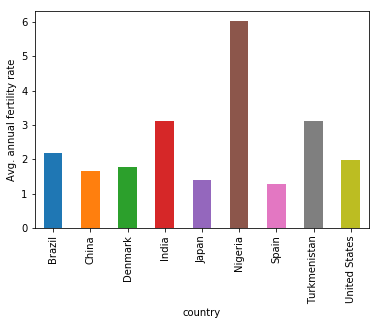

In [87]:
ax = data_wb.groupby('country').frt.mean().plot(kind='bar')
ax.set_ylabel('Avg. annual fertility rate')

The following graph presents annual growth rate of the fertility rate for each country. We observe that denmark is the only country with a negative growth rate. The leading country is India with a growth rate of 0.020 over the years. Surprisingly, Nigeria and the US have almost the same growth rate.

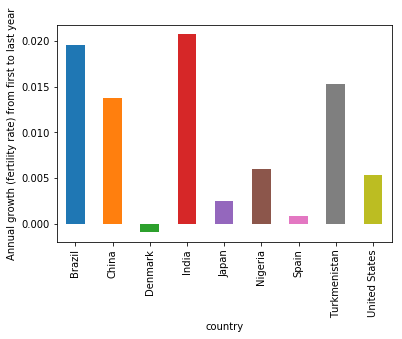

In [88]:
def annual_growth(x): 
    x_last    = x.values[-1]
    x_first   = x.values[0]
    num_years = len(x)
    
    growth_annualized = (x_last/x_first)**(1/num_years) - 1.0
    return growth_annualized

ax = data_wb.groupby('country')['frt'].agg(annual_growth).plot(kind='bar')
ax.set_ylabel('Annual growth (fertility rate) from first to last year'); 

Look what kind of variables we have. Years should be a numeric variable for the next grapph, but it is a objective (string).

In [89]:
data_wb.dtypes

country        object
year           object
gdp_pC        float64
pop             int64
urban_pop%    float64
frt           float64
gdp_in_bil    float64
dtype: object

We convert year into a float variable.

In [92]:
data_wb['year'] = data_wb.year.astype(float)

We prove what we have done.

In [94]:
data_wb.dtypes

country        object
year          float64
gdp_pC        float64
pop             int64
urban_pop%    float64
frt           float64
gdp_in_bil    float64
dtype: object

 ## Fertility rate per country from 1990 untill 2016

In [96]:
data_wb = data_wb.set_index(["year", "country"])

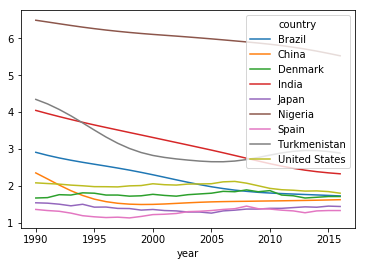

In [97]:
#plot fertility rate over the years
data_wb.unstack('country')['frt'].plot()

The fertility rate declines continously in the most countries. An exseption is Turkmenistan. In this country the fertility rate seems to oszilliate. The US had a little peak in 2007, but since then the fertility rate is declining. 

## Correlation Table

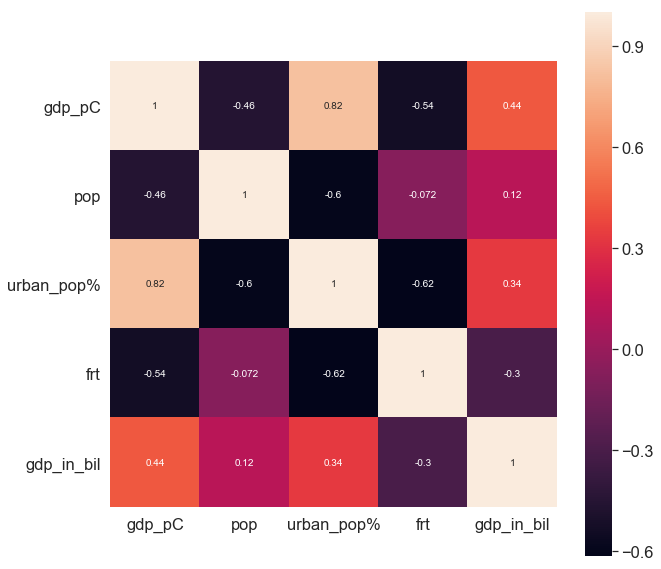

In [84]:
import seaborn as sns
fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(data_wb.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

This gives a good indication for what to expect from the regression. 
As expected, GDP per capita is negatively correlated to population and fertility rate, and 
positively correlated to urban population.

Strong correlation between the explanatory variables might give colinearity problems (?) 